# Ruokailuvälineiden tunnistus eri konvoluutioneuroverkkomalleilla
Projektin tehnyt: Petra, Kaisla, Wilma & Anna

### Projektin tavoite
Projektin tavoitteena oli kehittää kuvantunnistusmalli, joka pystyy luokittelemaan kuvat ruokailuvälineistä – haarukoista, veitsistä ja lusikoista. Tavoitteena oli selvittää, miten eri konvoluutioneuroverkkomallit suoriutuvat tehtävästä itse kuvatulla ja esikäsitellyllä datasetillä. Toteutuksessa edettiin vaiheittain kolmen eri mallin kautta kasvavan vaativuuden mukaan.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 🎯 Luokat
class_names = ['haarukka', 'lusikka', 'veitsi']


Datasetti on itse kerätty, ja se sisältää kuvia haarukoista, lusikoista ja veitsistä erilaisista kuvakulmista ja valaistusolosuhteista. Kuvia on 60 jokaisesta luokasta.

Kuvat on esikäsitelty seuraavasti:
- Rajaus, koon muuttaminen kokoon 224x224
- Jako kolmeen osaan:
  - Koulutusdata: 70%
  - Validointidata: 15%
  - Testidata: 15%
- Data agumentoidaan
  - Vaakasuuntainen peilaus
  - Satunnainen kierto
  - Satunnainen zoomaus


In [55]:
# Ladataan tulokset .npz-tiedostoista
CNN_data = np.load("CNN_kuvantunnistus_results.npz", allow_pickle=True)
VGG_data = np.load("VGG_kuvantunnistus_results.npz", allow_pickle=True)
VGG_fineTuned_data = np.load("VGG_FineTuned_kuvantunnistus_results.npz", allow_pickle=True)

models = {
    "CNN": CNN_data,
    "Feature Extraction (VGG16)": VGG_data,
    "Fine-tuned VGG16": VGG_fineTuned_data,
}

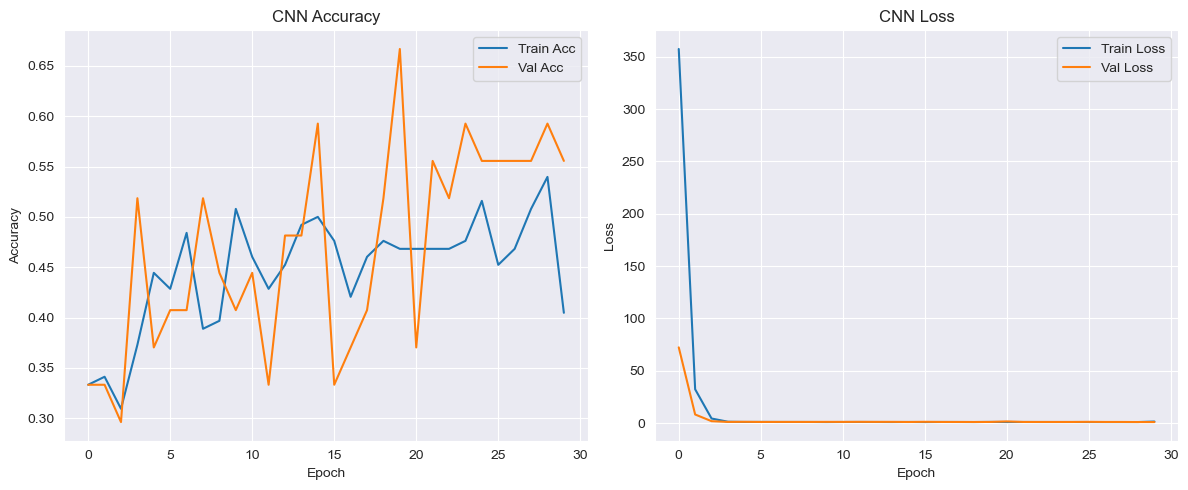

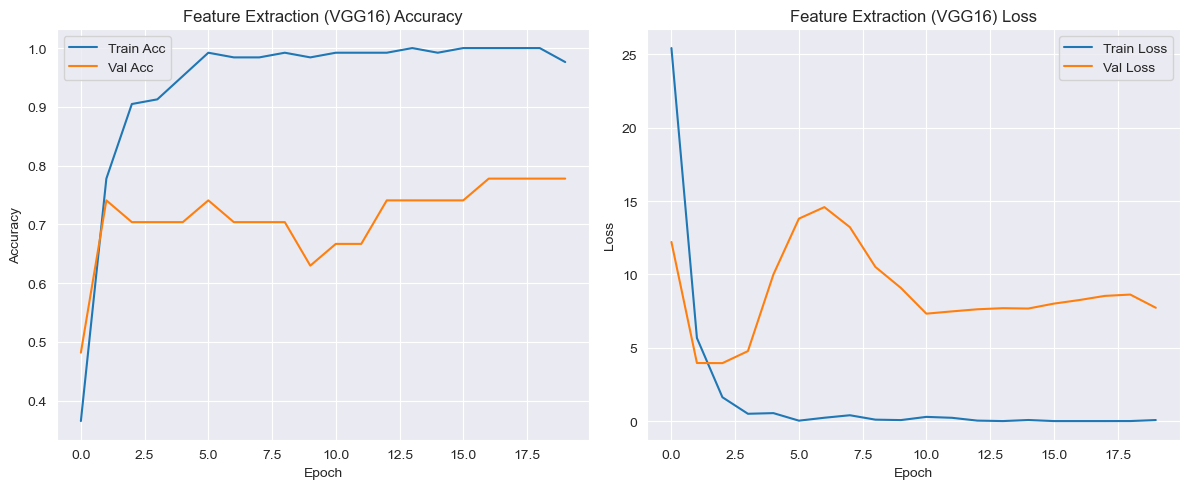

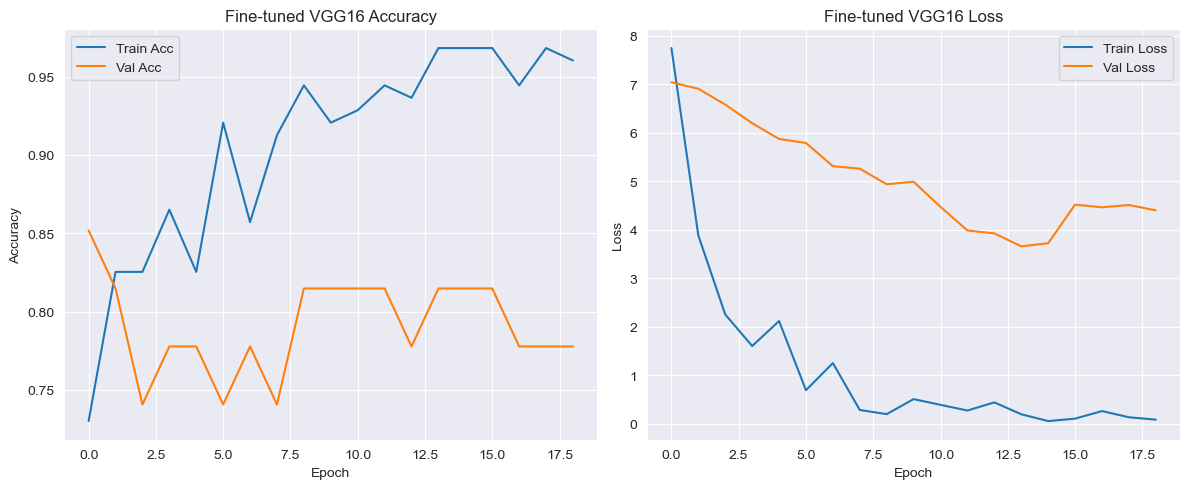

In [56]:
# 🎨 Oppimiskäyrät: tarkkuus ja tappio
def plot_training_curves(data, model_name):
    history = data['history'].item()  # oletus: dict
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Acc')
    plt.plot(history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Piirrä kaikille malleille
for name, data in models.items():
    plot_training_curves(data, name)

Esikoulutetun mallin käyttö toi huomattavan parannuksen tarkkuuteen.

Oman CNN-mallin rajoitteet liittyivät todennäköisesti pieneen datamäärään ja yksinkertaiseen arkkitehtuuriin.

VGG16:n valmiiksi opetetut piirteet sopivat hyvin ruokailuvälineiden visuaalisten erojen tunnistamiseen.

### Koetut haasteet ja ratkaisut
Haasteet:
- Rajoitettu datamäärä saattoi johtaa oman CNN-mallin ylisovittamiseen.
- Pienenkin datasetin kerääminen oli työlästä

Ratkaisut:
- Datan augmentointi harjoitusdatassa paransi mallien yleistystä.
- Esikoulutettujen mallien hyödyntäminen mahdollisti pienemmän datamäärän hyödyntämisen tehokkaammin.

### Pohdinta mallien soveltuvuudesta
Oma CNN toimi perustason kokeiluna, mutta osoittautui riittämättömäksi ilman suurempaa datamäärää tai monimutkaisempaa arkkitehtuuria.

Esikoulutettu VGG16 osoittautui tehokkaaksi, vaikka vain luokittelijaa koulutettiin. Tämä lähestymistapa on hyvä kompromissi laadun ja vaivannäön välillä.

Fine-tuned VGG16 on Potentiaalisesti paras, erityisesti kun datan laatu paranee. Tämä vaatii enemmän koulutusaikaa ja laskentatehoa, mutta se voi tuoda lisähyötyä erityisesti vaikeammissa luokittelutehtävissä.

### Yhteenveto
Projektin aikana toteutettiin kolme erilaista mallia ja vertailtiin niiden suorituskykyä. Tulokset osoittivat, että esikoulutettujen mallien käyttö tuo merkittäviä parannuksia varsinkin pienemmällä datasetillä.